<a href="https://colab.research.google.com/github/LameesKadhim/face-detection-python/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## source: 
 https://www.youtube.com/watch?v=SGUjxADb-I0&list=PLYW0LRZ3ePo7ZCXH2VFAVlTZ_b6LJeOPB&index=62&ab_channel=HussamHourani

In [1]:
pip install opencv-python

## plot photo with detected faces using **opencv cascade classifier**

In [2]:
# import necessary libraries
from cv2 import imread
# from cv2 import imshow (this function disabled in colab)
from google.colab.patches import cv2_imshow # a substitution for imshow in colab
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle


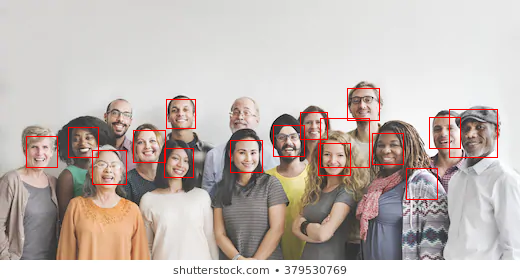

In [3]:
# load the photo
pixels = imread('faces.jpg')

# load the pretrained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')

# perform face detection
face_boxes = classifier.detectMultiScale(pixels)

#print bounding box for each detected face
for box in face_boxes:
  #extract
  x1, y1, width, height = box
  x2, y2 = x1 + width, y1 + height
  # draw arectangle over the pixels
  rectangle(pixels, (x1, y1), (x2, y2), (0,0,255), 1)

# show the image
cv2_imshow( pixels)

# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

## face detection using **deep learning** 

In [4]:
pip install mtcnn

In [5]:
# face detection with mtcnn on a photo
from matplotlib import pyplot 
from matplotlib.patches import Rectangle, Circle
from mtcnn import MTCNN


In [6]:
# load image from file
filename = 'face2.jpg'
img = pyplot.imread(filename)

# create the detector using default weight
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(img)
# print faces positions
for face in faces:
  print(face)

{'box': [179, 81, 39, 54], 'confidence': 0.9999978542327881, 'keypoints': {'left_eye': (189, 101), 'right_eye': (209, 101), 'nose': (198, 113), 'mouth_left': (189, 121), 'mouth_right': (208, 121)}}
{'box': [105, 142, 37, 49], 'confidence': 0.9999963045120239, 'keypoints': {'left_eye': (117, 160), 'right_eye': (135, 164), 'nose': (124, 174), 'mouth_left': (113, 175), 'mouth_right': (130, 180)}}
{'box': [60, 55, 42, 58], 'confidence': 0.9999908208847046, 'keypoints': {'left_eye': (73, 79), 'right_eye': (92, 80), 'nose': (83, 93), 'mouth_left': (72, 97), 'mouth_right': (91, 98)}}
{'box': [314, 76, 37, 50], 'confidence': 0.9999306201934814, 'keypoints': {'left_eye': (324, 94), 'right_eye': (341, 96), 'nose': (331, 106), 'mouth_left': (322, 111), 'mouth_right': (339, 113)}}
{'box': [265, 108, 43, 59], 'confidence': 0.9999163150787354, 'keypoints': {'left_eye': (277, 133), 'right_eye': (297, 130), 'nose': (290, 144), 'mouth_left': (279, 152), 'mouth_right': (299, 149)}}
{'box': [129, 70, 32,

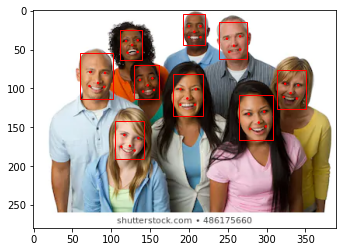

In [7]:
# function to draw boxes on the faces detected
def draw_image_with_boxes(filename, result_list):
  # load the image
  data = pyplot.imread(filename)
  # plot the image
  pyplot.imshow(data)
  # get the context for drawing boxes
  ax = pyplot.gca()
  #plot each box
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']

    # create the shape
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    # draw dots on eye, nose and mouth
    for key, value in result['keypoints'].items():
      # create and draw dots
      dot = Circle(value, radius=1, color='red')
      ax.add_patch(dot)

  pyplot.show()

draw_image_with_boxes(filename, faces)

## **Extract the face from the image** 

In [8]:
# required imports
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN


In [18]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(300,300)):
  #load image from file
  pixels = pyplot.imread(filename)
  # create the detector using default weights
  detector = MTCNN()
  # detect faces in the image
  results = detector.detect_faces(pixels)
  #extract the bounding box from the first face
  x1, y1, width, height = results[0]['box']
  x2, y2 = x1 + width, y1 + height
  # extract the face
  face = pixels[y1:y2, x1:x2]
  #resize pixels to the model size
  image = Image.fromarray(face)
  image = image.resize(required_size)
  face_array = asarray(image)
  return face_array

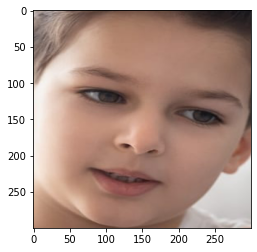

In [19]:
# load the photo and extract the face
pixels = extract_face('face3.jpg')
# plot the extracted face
pyplot.imshow(pixels)

# show the plot
pyplot.show()

## **extract multiple faces from the image**

In [20]:
#draw each face seperately
def draw_faces(filename, result_list):
  # load the image
  data = pyplot.imread(filename)
  # plot each face as a subplot
  for i in range(len(result_list)):
    # get coordinates
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height
    # define subplot
    pyplot.subplot(1, len(result_list), i+1)
    pyplot.axis('off')
    # plot face
    pyplot.imshow(data[y1:y2, x1:x2])

  # show the plot
  pyplot.show()


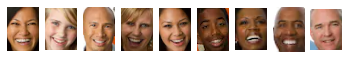

In [21]:
filename = 'face2.jpg'
#load image from file
pixels = pyplot.imread(filename)
# create the detector using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces
draw_faces(filename, faces)